In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import sys
import imodels
import pmlb
import imodelsx.process_results
from collections import defaultdict
sys.path.append('../experiments/')
# results_dir = '../results/multitask_gam/'
results_dir = '../results/multitask_gam_mar12/'

r = imodelsx.process_results.get_results_df(results_dir)
experiment_filename = '../experiments/03_multitask_gam.py'
d = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename)
d = imodelsx.process_results.average_over_seeds(
    d, experiment_filename, key_to_average_over='seed'
)
# r.to_pickle('../results/agg.pkl')
# imodelsx.process_results.delete_runs_in_dataframe(r[(r.use_multitask == 0) * (r.linear_penalty != 'ridge')], actually_delete=True)
# imodelsx.process_results.get_experiment_keys(r, experiment_filename)

[2024-03-12 11:19:16,423] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/pkg_resources/__init__.py:2350: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_bui

### Compare baseline to best setting

,setting,n_datasets,frac_improved,avg_change,avg_multitask,avg_standard
0,All,130,0.654,0.002,0.783,0.781
1,>=10 features,76,0.816,0.020,0.843,0.823
2,>=25 features,33,0.970,0.041,0.874,0.832
3,Well predicted,114,0.702,0.010,0.855,0.845
4,PMLB,122,0.648,0.002,0.784,0.782


top dsets


use_multitask,dataset_name,standard,multitask,num_features,num_samples,feature_over_samples,improvement
101,648_fri_c1_250_50,0.71,0.88,50.0,200.0,0.25,0.17
104,651_fri_c0_100_25,0.71,0.83,25.0,80.0,0.31,0.12
68,603_fri_c0_250_50,0.67,0.79,50.0,200.0,0.25,0.11
110,659_sleuth_ex1714,0.39,0.48,7.0,37.0,0.19,0.09
98,645_fri_c3_500_50,0.75,0.84,50.0,400.0,0.12,0.09
94,637_fri_c1_500_50,0.79,0.88,50.0,400.0,0.12,0.09
109,658_fri_c3_250_25,0.62,0.71,25.0,200.0,0.12,0.08
87,626_fri_c2_500_50,0.80,0.86,50.0,400.0,0.12,0.07
54,588_fri_c4_1000_100,0.83,0.88,100.0,800.0,0.12,0.06
97,644_fri_c4_250_25,0.78,0.83,25.0,200.0,0.12,0.06


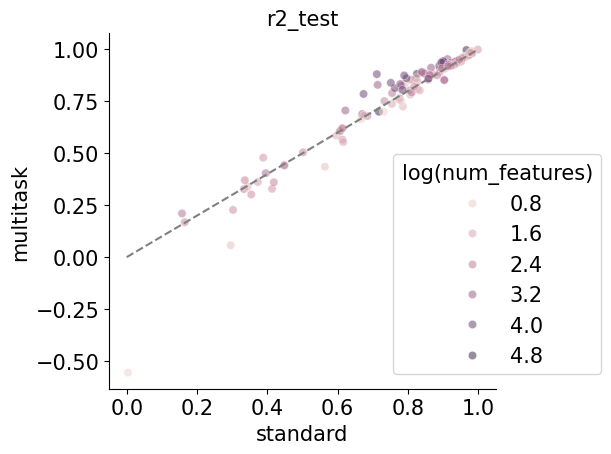

,setting,n_datasets,frac_improved,avg_change,avg_multitask,avg_standard
0,All,103,0.379,0.001,0.847,0.846
1,>=10 features,69,0.449,0.008,0.847,0.839
2,>=25 features,30,0.567,0.028,0.854,0.826
3,Well predicted,100,0.370,-0.000,0.860,0.861
4,Multi-output,15,0.333,0.010,0.744,0.735
5,PMLB,86,0.384,-0.001,0.865,0.866


top dsets


use_multitask,dataset_name,standard,multitask,num_features,num_samples,feature_over_samples,improvement
9,Hill_Valley_with_noise,0.56,0.87,100.0,969.0,0.10,0.31
10,Hill_Valley_without_noise,0.66,0.92,100.0,969.0,0.10,0.26
1,3s-guardian1000_multitask,0.55,0.68,1000.0,241.0,4.15,0.13
21,analcatdata_japansolvent,0.62,0.75,9.0,41.0,0.22,0.12
0,3s-bbc1000_multitask,0.68,0.77,1000.0,281.0,3.56,0.09
58,hepatitis,0.67,0.75,19.0,124.0,0.15,0.09
78,parity5,0.25,0.33,5.0,25.0,0.20,0.08
3,3s-reuters1000_multitask,0.60,0.67,1000.0,235.0,4.26,0.07
2,3s-inter3000_multitask,0.54,0.61,3000.0,135.0,22.22,0.07
89,sonar,0.91,0.98,60.0,166.0,0.36,0.06


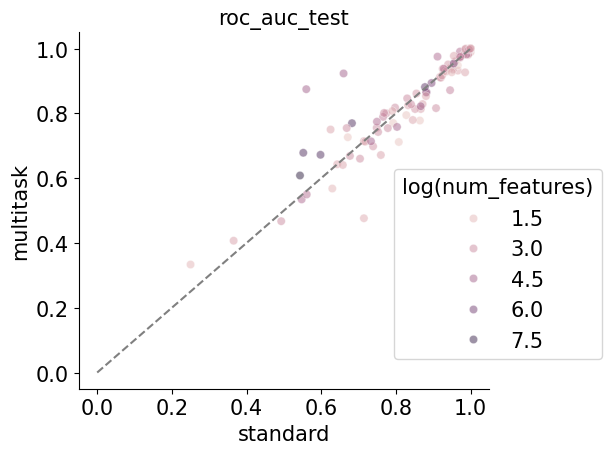

In [17]:
# filter datasets for which there is a row with use_multitask=0 and use_multitask=1 (done running)
def evaluate(d, metric='r2_test'):
    d2 = d.groupby(['dataset_name'])
    d2 = d2.filter(lambda x: len(x) == 2)

    # pivot table for d2 based on dataset_name, use_multitask, and r2_test
    metric_table = d2.pivot_table(index=['dataset_name'], columns=[
        'use_multitask'], values=metric)

    # add num_features based on dataset_name
    n_features = d2.groupby(['dataset_name']).first().n_features
    n_samples = d2.groupby(['dataset_name']).first().n_samples

    # add some metadata filters
    metric_table['num_features'] = n_features
    metric_table['num_samples'] = n_samples
    metric_table['feature_over_samples'] = metric_table['num_features'].astype(
        int) / metric_table['num_samples'].astype(int)
    metric_table = metric_table.rename(
        columns={0: 'standard', 1: 'multitask'}).reset_index()

    # table of breakdowns
    breakdown_idxs = {
        'All': metric_table['standard'] > -100,
        '>=10 features': metric_table['num_features'] >= 10,
        '>=25 features': metric_table['num_features'] >= 25,
        'Well predicted': metric_table['standard'] > 0.5,
        'Multi-output': metric_table['dataset_name'].str.endswith('_multitask'),
        'PMLB': metric_table['dataset_name'].isin(pmlb.dataset_names),
    }

    metric_table['improvement'] = metric_table['multitask'] - \
        metric_table['standard']
    summ = defaultdict(list)
    for setting, idxs in breakdown_idxs.items():
        if idxs.sum() > 0:
            summ['setting'].append(setting)
            summ['n_datasets'].append(idxs.sum())
            summ['frac_improved'].append(
                (metric_table['improvement'][idxs] > 0).mean())
            summ['avg_change'].append(
                metric_table['improvement'][idxs].mean())
            summ['avg_multitask'].append(
                metric_table['multitask'][idxs].mean())
            summ['avg_standard'].append(metric_table['standard'][idxs].mean())

    # multioutput
    display(pd.DataFrame(summ).round(3))
    print('top dsets')
    display(metric_table.sort_values(
        'improvement', ascending=False).head(30).round(2))
    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # display(r2_table.sort_values('improvement', ascending=False).round(2))

    # make plot
    plt.plot([0, 1], [0, 1], '--', color='gray')
    # hue on log scale
    metric_table['num_features_log'] = np.log(metric_table['num_features'])
    sns.scatterplot(data=metric_table, x='standard',
                    y='multitask', hue='num_features_log', alpha=0.5)
    plt.legend(loc='center right', bbox_to_anchor=(
        1.3, 0.35), title='log(num_features)')
    plt.title(metric, fontsize='medium')
    # plt.xlim([0.5, 1.05])
    # plt.ylim([0.5, 1.05])
    plt.savefig(f'../figs/{metric}.pdf', bbox_inches='tight')
    plt.show()


d_best = d[
    (d.linear_penalty == 'ridge') * (d.n_boosting_rounds == 0) *
    (d.interactions == 0.95) * (d.use_onehot_prior == 0) *
    (d.use_input_normalization == 1) * (d.use_internal_classifiers == 0)
]
evaluate(d_best[d_best['corr_test'].notna()], metric='r2_test')
evaluate(d_best[d_best['roc_auc_test'].notna()], metric='roc_auc_test')

### Compare different settings

In [27]:
cols = [
    'use_multitask', 'use_internal_classifiers', 'interactions', 'n_boosting_rounds', 'use_renormalize_features',
    'use_onehot_prior', 'use_input_normalization', 'linear_penalty',
]

groups = d.groupby(cols)
display(groups.size())

dset_names = [set(d.loc[g]['dataset_name'].values)
              for g in groups.groups.values()]
dset_names_shared = list(set.intersection(*dset_names))
print(len(dset_names_shared), 'completed shared datasets')
dc = d[d.dataset_name.isin(dset_names_shared)]

use_multitask  use_internal_classifiers  interactions  n_boosting_rounds  use_renormalize_features  use_onehot_prior  use_input_normalization  linear_penalty
0              0                         0.95          0                  0                         0                 1                        ridge             86
1              0                         0.95          0                  0                         0                 1                        ridge             99
                                                                                                    1                 1                        ridge             47
               1                         0.95          0                  0                         0                 1                        ridge             97
dtype: int64

45 completed shared datasets


In [ ]:
# compute stats per group
groups = dc.groupby(cols)
group_idxs = list(groups.groups.values())
baseline_group = dc.loc[group_idxs[0].values].sort_values(by='dataset_name')
stat_cols = defaultdict(list)
for group in groups.groups.values():
    g = dc.loc[group].sort_values(by='dataset_name')
    stat_cols['win_rate'].append(
        (g['r2_test'].values >=
         baseline_group['r2_test'].values).mean())
    stat_cols['r2_test__>=25_features'] = g[g['n_features']
                                            >= 25]['r2_test'].mean()
    stat_cols['r2_test'].append(g['r2_test'].mean())
stat_cols = pd.DataFrame(stat_cols)

# save with index
stats = groups['r2_test'].mean().reset_index()
for col in stat_cols.columns:
    stats[col] = stat_cols[col].values


# color last 2 columns by value
display(
    stats
    .style
    .background_gradient(
        cmap='viridis', subset=['r2_test', 'r2_test__>=25_features']
    )
    .format(precision=3)
)